# Titanic - Machine Learning from Disaster

!pip install numpy pandas matplotlib seaborn scikit-learn 

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#read train and test csv in dataframe
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids= test["PassengerId"]

In [60]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
#checking null value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
def clean(data):
    """ Clean up dataFrame"""
    data = data.drop(['Ticket','Cabin','Name','PassengerId'], axis=1)
    cols = ['SibSp','Parch','Fare','Age']
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data['Embarked'].fillna("U", inplace=True)
    return data

In [65]:
data = clean(data)
test = clean(test)

In [66]:
data.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S


In [67]:
embarked_counts = data['Embarked'].value_counts()

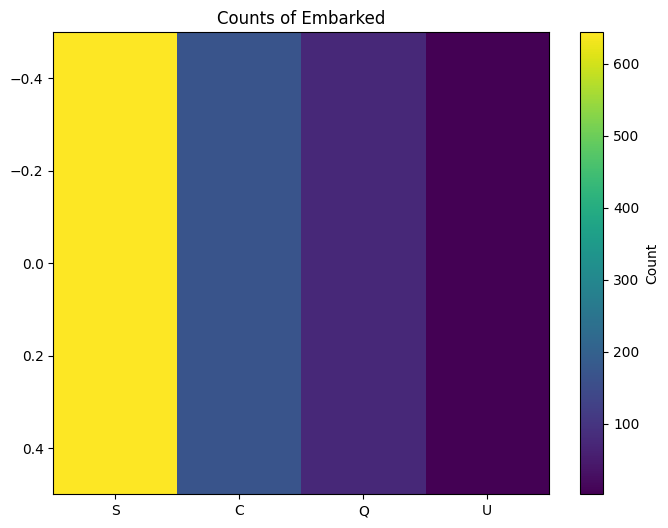

In [68]:
plt.figure(figsize=(8, 6))
plt.imshow([embarked_counts], cmap='viridis', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=range(len(embarked_counts)), labels=embarked_counts.index)
plt.title('Counts of Embarked')
plt.show()

In [69]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [70]:
# Data preprocessing:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols= ["Sex", "Embarked"]
for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [71]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
y = data["Survived"]
X = data.drop("Survived",axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(712, 7)
(712,)


In [74]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5,2
733,2,1,23.0,0,0,13.0,2


In [75]:
X_val.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2


In [76]:
y_train.head(2)

331    0
733    0
Name: Survived, dtype: int64

In [77]:
y_val.head(2)

709    1
439    0
Name: Survived, dtype: int64

In [78]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)

In [79]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_val)
accuracy_score(y_val, predictions)

0.8100558659217877

In [80]:
# submission_preds = clf.predict(test.drop('Survived',axis=1))
submission_preds = clf.predict(test)

In [81]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,})

In [82]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [83]:
df.to_csv("submission.csv",index=False)